<a href="https://colab.research.google.com/github/Ibtisam-Mohammad/DS2Project-1/blob/main/Covid19_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Covid-19 Study**


### **Team:**

  * Ananya Sadana
  * Ibtisam 
  * Jai Aravind
  * Raghav Sahni

## Importing Libraries

In [ ]:
import requests
from IPython.core.display import HTML
from statistics import mode

In [ ]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import base
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set()
import tensorflow as tf
from datetime import datetime
from sklearn.metrics import mean_absolute_error
tf.keras.backend.clear_session()

import warnings

#Italy

## Data Exploration

In [ ]:
df = pd.read_csv("covid19_italy_region.csv")
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [ ]:
df.shape

(4242, 17)

In [ ]:
df["RegionName"].value_counts()

Puglia                   202
Valle d'Aosta            202
Emilia-Romagna           202
Calabria                 202
P.A. Trento              202
Sardegna                 202
Molise                   202
Veneto                   202
Campania                 202
Friuli Venezia Giulia    202
P.A. Bolzano             202
Lombardia                202
Basilicata               202
Marche                   202
Umbria                   202
Piemonte                 202
Toscana                  202
Liguria                  202
Lazio                    202
Abruzzo                  202
Sicilia                  202
Name: RegionName, dtype: int64

In [ ]:
#Describes categotical columns
df.describe(include = "O") 

,Date,Country,RegionName
count,4242,4242,4242
unique,202,1,21
top,2020-07-27T17:00:00,ITA,Puglia
freq,21,4242,202


In [ ]:
#Checks for null values in all columns
df.isna().any()

SNo                          False
Date                         False
Country                      False
RegionCode                   False
RegionName                   False
Latitude                     False
Longitude                    False
HospitalizedPatients         False
IntensiveCarePatients        False
TotalHospitalizedPatients    False
HomeConfinement              False
CurrentPositiveCases         False
NewPositiveCases             False
Recovered                    False
Deaths                       False
TotalPositiveCases           False
TestsPerformed                True
dtype: bool

In [ ]:
df.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
4237,4237,2020-09-12T17:00:00,ITA,19,Sicilia,38.115697,13.362357,116,18,134,1613,1747,44,3144,289,5180,298359.0
4238,4238,2020-09-12T17:00:00,ITA,9,Toscana,43.769231,11.255889,74,18,92,2310,2402,138,9473,1148,13023,419422.0
4239,4239,2020-09-12T17:00:00,ITA,10,Umbria,43.106758,12.388247,18,4,22,397,419,33,1542,81,2042,106482.0
4240,4240,2020-09-12T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,3,0,3,31,34,1,1078,146,1258,18424.0
4241,4241,2020-09-12T17:00:00,ITA,5,Veneto,45.434905,12.338452,99,12,111,2829,2940,138,19586,2141,24667,668332.0


No handles with labels found to put in legend.


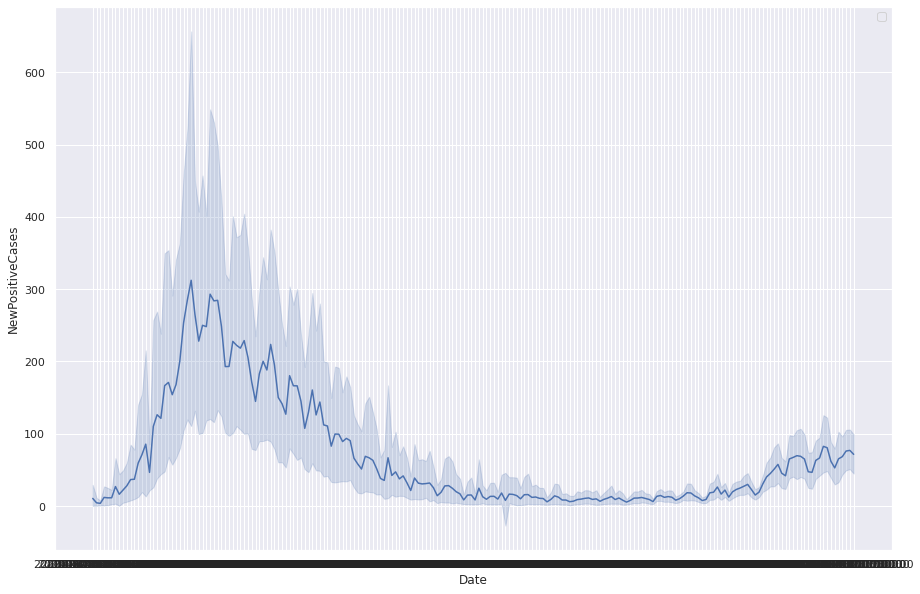

In [ ]:
#To check the trend of new cases per day
import seaborn as sns
sns.set(rc = {"figure.figsize":(15,10)})
sns.lineplot(x = "Date", y = "NewPositiveCases",data = df)
plt.legend()
plt.show()

In [ ]:
#Plotting to see how the total cases increase everyday
sns.set(rc = {"figure.figsize":(15,10)})
sns.lineplot(x = "Date", y = "TotalPositiveCases",data = df)
plt.show()

In [ ]:
brazil = pd.read_csv("brazil_covid19_macro.csv")
brazil.head()

In [ ]:
#Checking for Null Values
brazil.isna().any()

In [ ]:
#Plotting to see how the total cases increase everyday
sns.set(rc = {"figure.figsize":(15,10)})
sns.lineplot(x = "date", y = "cases",data = brazil)
plt.show()

In [ ]:
import datetime as dt
df["Date"] = pd.to_datetime(df["Date"])
df.head()

In [ ]:
df["Date"] = df["Date"].map(dt.datetime.toordinal)
df.head()

In [ ]:
brazil["date"] = pd.to_datetime(brazil["date"])
brazil["date"] = brazil["date"].map(dt.datetime.toordinal)
brazil.head()

In [ ]:
brazil.tail()

## Polynomial Regression 

In [ ]:
Italy  = {}
for ind, i in enumerate(df["Date"].values):
    if i in Italy.keys():
        Italy[i] += df["TotalPositiveCases"].values[ind]
    else:
        Italy[i] = df["TotalPositiveCases"].values[ind]

In [ ]:
#Define predictor and variable to be predicted
x = np.fromiter(Italy.keys(), dtype=int)
y = np.fromiter(Italy.values(), dtype=int)

In [ ]:
sns.set(rc = {"figure.figsize":(15,10)})
sns.lineplot(x = x, y = y)
plt.show()

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size = 0.8)

In [ ]:
X_poly_train = PolynomialFeatures(3).fit_transform(x_train.reshape(-1,1))
X_poly_val = PolynomialFeatures(3).fit_transform(x_val.reshape(-1,1))


In [ ]:
len(X_poly_train)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_poly_train, y_train)
y_val_pred = linreg.predict(X_poly_val)
mse_final = mean_squared_error(y_val, y_val_pred)

In [ ]:
print(mse_final)

In [ ]:
X_t = x_val.reshape(-1,1)

In [ ]:
idx = np.argsort(X_t[:,0])
x_t = X_t[idx]
y_v = y_val_pred[idx]

In [ ]:
plt.close()
plt.scatter(x, y)
plt.plot(x_t,y_v, color = "red",label="Polynomial fit", alpha=0.6)
plt.xlabel("Spreading Factor")
plt.ylabel("Perc_population")
plt.title("Scatter plot showing relationship between Spreading factor and perc_population")
plt.legend()
plt.show()

In [ ]:
# your code here
maxdeg = 30
alpha = [0.001,0.01,0.1,1,10,100,1000]

In [ ]:
training_mse, validation_mse = [],[]
cve_mean = {}
for a in alpha:
    X_poly = PolynomialFeatures(maxdeg).fit_transform(x.reshape(-1,1))
    X_poly_train =  PolynomialFeatures(maxdeg).fit_transform(x_train.reshape(-1,1))
    X_poly_val= PolynomialFeatures(maxdeg).fit_transform(x_val.reshape(-1,1))
    lasso_reg = Lasso(alpha=a,fit_intercept=True)
    lasso_reg.fit(X_poly_train, y_train)
    y_train_pred = lasso_reg.predict(X_poly_train)
    y_val_pred = lasso_reg.predict(X_poly_val)
    training_mse.append(mean_squared_error(y_train_pred, y_train))
    validation_mse.append(mean_squared_error(y_val, y_val_pred))
    mse_score = cross_validate(estimator = lasso_reg,X = X_poly,y = y, scoring = "neg_mean_squared_error", cv = 10)
    cve_mean[abs(mse_score["test_score"].mean())] = a
    
best_alpha = cve_mean[min(cve_mean.keys())]

In [ ]:
best_alpha

In [ ]:
cve_mean

In [ ]:
# your code here
degree=30
significant_degrees = {}
for i in range(degree):
    X_poly_train =  PolynomialFeatures(degree).fit_transform(x_train.reshape(-1,1))
    X_poly_val= PolynomialFeatures(degree).fit_transform(x_val.reshape(-1,1))
    lasso_reg = Lasso(alpha=0.01,fit_intercept=False)
    lasso_reg.fit(X_poly_train, y_train) 
    y_train_pred = lasso_reg.predict(X_poly_train) 
    y_val_pred = lasso_reg.predict(X_poly_val)
    for  i,beta in enumerate(lasso_reg.coef_):
        if abs(beta) > 0.1:
            if i in significant_degrees.keys():
                significant_degrees[i] = significant_degrees[i] + 1
            else:
                significant_degrees[i] = 1

In [ ]:
significant_degrees

In [ ]:
plt.bar(significant_degrees.keys(), significant_degrees.values(), width = 0.1, color = "blue")
plt.xlabel("Degrees")
plt.ylabel("Frequencies")

In [ ]:
print("The plot will be linear")

The plot will be linear


In [ ]:
X_poly_train =  PolynomialFeatures(0).fit_transform(x_train.reshape(-1,1))
X_poly_val= PolynomialFeatures(0).fit_transform(x_val.reshape(-1,1))
lasso_reg = Lasso(alpha=0.01,fit_intercept=False)
lasso_reg.fit(X_poly_train, y_train)
y_train_pred = lasso_reg.predict(X_poly_train)
y_val_pred = lasso_reg.predict(X_poly_val)
mse = mean_squared_error(y_val, y_val_pred)
print(mse)

5904391138.394933


In [ ]:
X_t = x_val.reshape(-1,1)

In [ ]:
idx = np.argsort(X_t[:,0])
x_t = X_t[idx]
y_v = y_val_pred[idx]

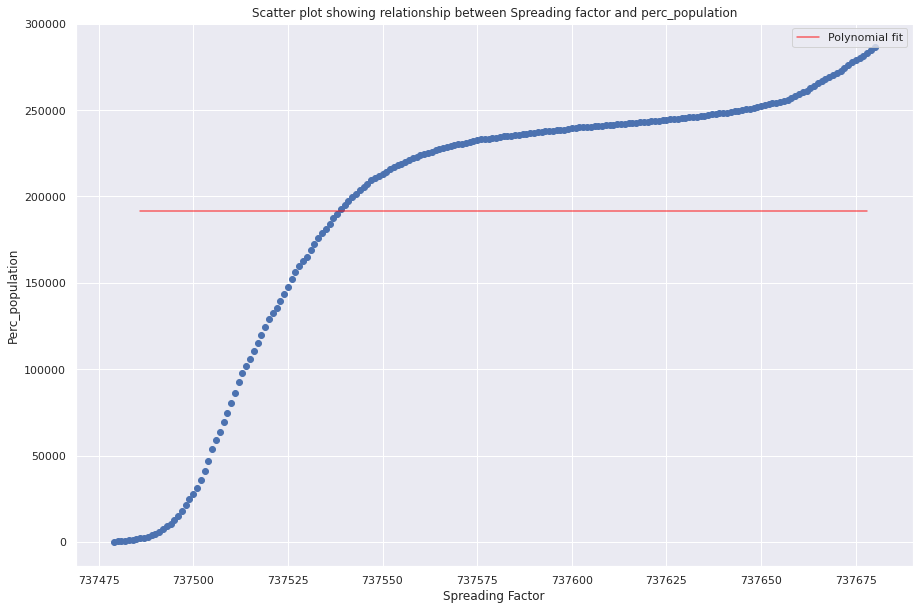

In [ ]:
plt.close()
plt.scatter(x, y)
plt.plot(x_t,y_v, color = "red",label="Polynomial fit", alpha=0.6)
plt.xlabel("Spreading Factor")
plt.ylabel("Perc_population")
plt.title("Scatter plot showing relationship between Spreading factor and perc_population")
plt.legend()
plt.show()

## Time Series Pipeline

In [ ]:
class ToSupervised(base.BaseEstimator,base.TransformerMixin):
    
    def __init__(self,col,groupCol,numLags,dropna=False):
        
        self.col = col
        self.groupCol = groupCol
        self.numLags = numLags
        self.dropna = dropna
        
    def fit(self,X,y=None):
        self.X = X
        return self
    
    def transform(self,X):
        tmp = self.X.copy()
        for i in range(1,self.numLags+1):
            tmp[str(i)+'_Week_Ago'+"_"+self.col] = tmp.groupby([self.groupCol])[self.col].shift(i) 
            
        if self.dropna:
            tmp = tmp.dropna()
            tmp = tmp.reset_index(drop=True)
            
        
            
        return tmp

In [ ]:
class ToSupervisedDiff(base.BaseEstimator,base.TransformerMixin):
    
    def __init__(self,col,groupCol,numLags,dropna=False):
        
        self.col = col
        self.groupCol = groupCol
        self.numLags = numLags
        self.dropna = dropna
        
    def fit(self,X,y=None):
        self.X = X
        return self
    
    def transform(self,X):
        tmp = self.X.copy()
        for i in range(1,self.numLags+1):
            tmp[str(i)+'_Week_Ago_Diff_'+"_"+self.col] = tmp.groupby([self.groupCol])[self.col].diff(i) 
            
        if self.dropna:
            tmp = tmp.dropna()
            tmp = tmp.reset_index(drop=True)
            
        return tmp

In [ ]:
from itertools import chain
class Kfold_time(object):
    
    def __init__(self,**options):
        
        
        self.target     = options.pop('target', None)
        self.date_col   = options.pop('date_col', None)
        self.date_init  = options.pop('date_init', None)
        self.date_final = options.pop('date_final', None)

        if options:
            raise TypeError("Invalid parameters passed: %s" % str(options))
            
        if ((self.target==None )| (self.date_col==None )| (self.date_init==None ) | (self.date_final==None )):
            raise TypeError("Incomplete inputs")
    
    def _train_test_split_time(self,X):
        n_arrays = len(X)
        if n_arrays == 0:
            raise ValueError("At least one array required as input")

        for i in range(self.date_init,self.date_final):

            train = X[X[self.date_col] < i]
            val   = X[X[self.date_col] == i]

            X_train, X_test = train.drop([self.target], axis=1), val.drop([self.target], axis=1)
            y_train, y_test = train[self.target].values, val[self.target].values

            yield X_train, X_test, y_train, y_test

    
    def split(self,X):
        cv_t = self._train_test_split_time(X)
        return chain(cv_t)

In [ ]:
class TimeSeriesRegressor(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self,model,cv,scoring,verbosity=True):
        self.model = model
        self.cv = cv
        self.verbosity = verbosity
        self.scoring = scoring 
        
            
    def fit(self,X,y=None):
        return self
        
    
    def predict(self,X=None):
        
        pred = {}
        for indx,fold in enumerate(self.cv.split(X)):

            X_train, X_test, y_train, y_test = fold    
            self.model.fit(X_train, y_train)
            pred[str(indx)+'_fold'] = self.model.predict(X_test)
            
        prediction = pd.DataFrame(pred)
    
        return prediction
    

    def score(self,X,y=None):


        errors = []
        for indx,fold in enumerate(self.cv.split(X)):

            X_train, X_test, y_train, y_test = fold    
            self.model.fit(X_train, y_train)
            prediction = self.model.predict(X_test)
            error = self.scoring(y_test, prediction)
            errors.append(error)

            if self.verbosity:
                print("Fold: {}, Error: {:.4f}".format(indx,error))

        if self.verbosity:
            print('Total Error {:.4f}'.format(np.mean(errors)))

        return errors

In [ ]:
def getDataFramePipeline(i):
    steps = [(str(i)+'_step',ToSupervised('TotalPositiveCases','RegionCode',i))]
    for j in range(1,i+1):
        if i==j:

            pp = (str(j)+'_step_diff',
                  ToSupervisedDiff(str(i)+'_Week_Ago_TotalPositiveCases','RegionCode',1,dropna=True))
            steps.append(pp)
        else:

            pp = (str(j)+'_step_diff',
                  ToSupervisedDiff(str(i)+'_Week_Ago_TotalPositiveCases','RegionCode',1))
            steps.append(pp)
            
    return steps

In [ ]:
df = df.drop(['Country', 'RegionName'], axis=1)

In [ ]:
steps = [('1_step',ToSupervised('TotalPositiveCases', 'RegionCode',1)),
         ('1_step_diff',ToSupervisedDiff('1_Week_Ago_TotalPositiveCases', 'RegionCode',1,dropna=True))]
super_1 = Pipeline(steps).fit_transform(df)

In [ ]:
super_1.head()

,SNo,Date,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,1_Week_Ago_TotalPositiveCases,1_Week_Ago_Diff__1_Week_Ago_TotalPositiveCases
0,1155,737534,13,42.351222,13.398438,317,40,357,1630,1987,34,276,258,2521,22424.0,2487.0,44.0
1,1156,737534,17,40.639471,15.805148,59,8,67,180,247,3,71,24,342,6528.0,339.0,2.0
2,1157,737534,18,38.905976,16.594402,142,6,148,696,844,24,116,75,1035,22234.0,1011.0,20.0
3,1158,737534,15,40.839566,14.250850,590,61,651,2371,3022,41,703,304,4029,34994.0,3988.0,37.0
4,1159,737534,8,44.494367,11.341721,3166,289,3455,10097,13552,376,5985,3023,22560,88776.0,22184.0,350.0


In [ ]:
super_1.drop([0])
super_1.head()

,SNo,Date,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,1_Week_Ago_TotalPositiveCases,1_Week_Ago_Diff__1_Week_Ago_TotalPositiveCases
0,1155,737534,13,42.351222,13.398438,317,40,357,1630,1987,34,276,258,2521,22424.0,2487.0,44.0
1,1156,737534,17,40.639471,15.805148,59,8,67,180,247,3,71,24,342,6528.0,339.0,2.0
2,1157,737534,18,38.905976,16.594402,142,6,148,696,844,24,116,75,1035,22234.0,1011.0,20.0
3,1158,737534,15,40.839566,14.250850,590,61,651,2371,3022,41,703,304,4029,34994.0,3988.0,37.0
4,1159,737534,8,44.494367,11.341721,3166,289,3455,10097,13552,376,5985,3023,22560,88776.0,22184.0,350.0


In [ ]:
super_1.tail()

,SNo,Date,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,1_Week_Ago_TotalPositiveCases,1_Week_Ago_Diff__1_Week_Ago_TotalPositiveCases
3082,4237,737680,19,38.115697,13.362357,116,18,134,1613,1747,44,3144,289,5180,298359.0,5136.0,104.0
3083,4238,737680,9,43.769231,11.255889,74,18,92,2310,2402,138,9473,1148,13023,419422.0,12885.0,147.0
3084,4239,737680,10,43.106758,12.388247,18,4,22,397,419,33,1542,81,2042,106482.0,2009.0,17.0
3085,4240,737680,2,45.737503,7.320149,3,0,3,31,34,1,1078,146,1258,18424.0,1257.0,3.0
3086,4241,737680,5,45.434905,12.338452,99,12,111,2829,2940,138,19586,2141,24667,668332.0,24529.0,173.0


In [ ]:
model = LinearRegression()

In [ ]:
kf = Kfold_time(target='TotalPositiveCases',date_col = 'Date',date_init=737534,date_final=737754)

In [ ]:
steps_3 = [('1_step',ToSupervised('TotalPositiveCases','RegionCode',3)),
         ('1_step_diff',ToSupervisedDiff('1_Week_Ago_TotalPositiveCases','RegionCode',1)),
         ('2_step_diff',ToSupervisedDiff('2_Week_Ago_TotalPositiveCases','RegionCode',1)),
         ('3_step_diff',ToSupervisedDiff('3_Week_Ago_TotalPositiveCases','RegionCode',1,dropna=True)),
         ('predic_3',TimeSeriesRegressor(model=model,cv=kf,scoring=mean_squared_error))]
super_3_p = Pipeline(steps_3).fit(df)

In [ ]:
kf_test = Kfold_time(target='TotalPositiveCases',date_col = 'Date',date_init=737755,date_final=737765)

In [ ]:
steps_10 = getDataFramePipeline(10)
super_10 = Pipeline(steps_10).fit_transform(df)
T = TimeSeriesRegressor(model=model,cv=kf_test,scoring=mean_squared_error, verbosity=True)
T.fit(super_10)
prediction =T.predict(super_10)

In [ ]:
prediction.head()

In [ ]:
T.score(super_10)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(prediction['0_fold'], df[df['Date']==737755].TotalPositiveCases)
plt.scatter(prediction['9_fold'], df[df['Date']==737765].TotalPositiveCases)
plt.xlabel('Total Positive Cases',fontsize=14)
plt.ylabel('Prediction',fontsize=14)
plt.title('Predicted vs Actual cases',fontsize=18)
plt.show()

In [ ]:
df[df['Date']==737755].TotalPositiveCases

Testing on Brazil's dataset

In [ ]:
brazil.rename(columns = {'country':'RegionCode'}, inplace = True)
brazil.rename(columns = {'cases':'TotalPositiveCases'}, inplace = True)
brazil.rename(columns = {'date':'Date'}, inplace = True)

In [ ]:
brazil = brazil.drop(['recovered', 'monitoring'], axis=1)

In [ ]:
le = preprocessing.LabelEncoder()
brazil['RegionCode'] = le.fit_transform(brazil['RegionCode'])

In [ ]:
steps_2 = [('1_step',ToSupervised('TotalPositiveCases', 'RegionCode',1)),
         ('1_step_diff',ToSupervisedDiff('1_Week_Ago_TotalPositiveCases', 'RegionCode',1,dropna=True))]
super_2 = Pipeline(steps).fit_transform(brazil)

In [ ]:
super_2.head()

In [ ]:
steps_50_b = getDataFramePipeline(50)
super_50_b = Pipeline(steps_50_b).fit_transform(brazil)
predict_brazil =T.predict(super_50_b)
predict_brazil.head()

In [ ]:
T.score(super_50_b)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(predict_brazil['0_fold'], brazil[brazil['Date']==737755].TotalPositiveCases)
plt.scatter(predict_brazil['9_fold'], brazil[brazil['Date']==737765].TotalPositiveCases)
plt.xlabel('Total Positive Cases',fontsize=14)
plt.ylabel('Prediction',fontsize=14)
plt.title('Predicted vs Actual cases',fontsize=18)
plt.show()

In [ ]:
print(f"Actual Case recorded: {brazil[brazil['Date']==737755].TotalPositiveCases.values[0]}\nPrediction for that date: {predict_brazil['0_fold'].values[0]}")

In [ ]:
print(f"Actual Case recorded: {brazil[brazil['Date']==737765].TotalPositiveCases.values[0]}\nPrediction for that date: {predict_brazil['9_fold'].values[0]}")

# **India** 

---
 **Taking a look at the future cases in India and judging the future of Brazil**

Region wise italian data

In [ ]:
ity_reg=pd.read_csv('covid19_italy_region.csv')
#cleaning data
ity_reg['Date']=pd.to_datetime(ity_reg['Date']).dt.date
ity_reg=ity_reg.sort_values(by=['RegionName','Date']).reset_index(drop=True)
ity_reg=ity_reg.drop(['Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement','Recovered','TestsPerformed','Country'],axis=1)

Brazil covid data

In [ ]:
br_state=pd.read_csv('brazil_covid19.csv')
#cleaning data
br_state.dropna(inplace=True)
br_state['date'] = pd.to_datetime(br_state['date']).dt.date
br_state=br_state.sort_values(by=['state','date']).reset_index(drop=True)


Brazil old covid data

In [ ]:
br_old=pd.read_csv('brazil_covid19_old.csv')
#cleaning data
br_old['date'] = pd.to_datetime(br_old['date']).dt.date
br_old=br_old.sort_values(by=['state','date']).reset_index(drop=True)
br_old=br_old.drop(['suspects','refuses','hour'],axis=1)
br_old

For plotting deaths vs cases and dates for old Brazillian data

In [ ]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(20,10))
sns.lineplot(x='date',y="deaths",data=br_old,ax=ax0,color='maroon')
ax1.axes.get_xaxis().set_ticks([])
sns.lineplot(x='cases',y="deaths",data=br_old,ax=ax1)
fig.autofmt_xdate()
plt.show

Brazil covid data city wise

In [ ]:

br_city=pd.read_csv('brazil_covid19_cities.csv')
#cleaning data
br_city.dropna(inplace=True)

# br_city['date'] = pd.to_datetime(br_city['date']).dt.date
# br_city=br_city.sort_values(by=['code','date'])

Indian data state wise

In [ ]:
df_ind=pd.read_csv('covid_19_india.csv')
#cleaning data
from datetime import datetime
df_ind.dropna(inplace=True)
df_ind=df_ind.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Time'],axis=1)

# df_ind['Date'] = pd.to_datetime(df_ind['Date']).dt.date
# df_ind=df_ind.sort_values(by=['State/UnionTerritory','Date']).reset_index(drop=True)

Increase in deaths and cases with time in India

In [ ]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(20,10))
sns.lineplot(x='Date',y="Deaths",data=df_ind,ax=ax0,color='maroon')
sns.lineplot(x='Date',y="Confirmed",data=df_ind,ax=ax1,color='blue')

plt.show

Date on which to impose Lockdown in Brazil based on Future India

In [ ]:
# Date on which to impose Lockdown in Brazil based on Future India
c,d =pd.DataFrame(),pd.DataFrame()

c=c.append(df_ind[df_ind['Date']=='25/03/20'],ignore_index=True)# lockdown date in India
d=d.append(df_ind[df_ind['Date']=='31/05/20'],ignore_index=True) # lockdown lifting date in India

ind_lock_death,ind_lock_case=c["Deaths"].sum(),c['Confirmed'].sum()
ind_end_death,ind_end_case=d["Deaths"].sum(),d['Confirmed'].sum()

j=0
for i in br_city['date'].unique():
  b=pd.DataFrame()
  b=b.append(br_city[br_city['date']==i],ignore_index=True)
  br_lock_death,br_lock_case = b["deaths"].sum(),b['cases'].sum()
    
  
  if (b["deaths"].sum()>ind_lock_death or b['cases'].sum()>ind_lock_case)and j==0:
    date_start=i
    print('Impose Lockdown on:',i,'as deaths are:',br_lock_death,'and cases are:',br_lock_case)
    j=j+1
  if b['cases'].sum()>ind_end_case:
    date_end=i
    print('Lift Lockdown on:',i,'as deaths are:',br_lock_death,'and cases are:',br_lock_case)
    break
    

Getting capital cities of Brazil using br_cord

In [ ]:
# Brazil data from where to get the capital cities
br_cord=pd.read_csv('/content/Data/Brazil/brazil_cities_coordinates.csv')
br_cord.dropna(inplace=True)

cap_city_br=br_cord[br_cord['capital']==True]['city_name'].values
br_cap_city=br_city[br_city['name'].isin(cap_city_br)]
br_cap_city['date'] = pd.to_datetime(br_cap_city['date']).dt.date
br_cap_city_daily=br_cap_city.copy()
#getting daily cases in capital cities
# br_cap_city_daily['daily cases']=br_cap_city.cases.diff()
# br_cap_city_daily['daily deaths']=br_cap_city.deaths.diff()
# a=(br_cap_city_daily[br_cap_city_daily['daily cases']<0]).index.tolist()
# b=(br_cap_city_daily[br_cap_city_daily['daily deaths']<0]).index.tolist()
# br_cap_city_daily=br_cap_city_daily.drop(a)
# br_cap_city_daily=br_cap_city_daily.drop(b,errors='ignore')
# br_cap_city_daily.dropna(inplace=True)

Plotting cases and deaths vs dates for capital cities

In [ ]:
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(20,10))

sns.lineplot(x='date',y="deaths",data=br_cap_city,ax=ax0,color='maroon',hue='name',legend=False)
ax0.axvline(x=datetime.strptime(date_start, "%Y-%m-%d"),color='red',label='Impose strict Lockdown')
ax0.axvline(x=datetime.strptime(date_end, "%Y-%m-%d"),color='green',label='Lift Lockdown')

sns.lineplot(x='date',y="cases",data=br_cap_city_daily,ax=ax1,color='blue')
ax1.axvline(x=datetime.strptime(date_start, "%Y-%m-%d"),color='red',label='Impose strict Lockdown')
ax1.axvline(x=datetime.strptime(date_end, "%Y-%m-%d"),color='green',label='Lift Lockdown')

fig.suptitle('Graphs showing at which point should Brazil impose and lift Lockdown')

ax0.legend()
ax1.legend()
plt.show

For plotting cases vs deaths in each brazillian capital

In [ ]:
fig, axes = plt.subplots(9,3, figsize=(20,20))
i =br_cap_city['name'].unique()
j=0
for ax in axes.ravel():
  b=br_cap_city[br_cap_city['name']==i[j]]
  sns.lineplot(x='cases',y='deaths',data=b,ax=ax)
  ax.set_title(i[j])
fig.tight_layout()
plt.show()

For plotting covid state wise data of india

In [ ]:
fig, axes = plt.subplots(int((len(df_ind['State/UnionTerritory'].unique())-4)/3),3, figsize=(30,50))
i=df_ind['State/UnionTerritory'].unique()
j=0
for ax in axes.ravel():

    if i[j] in ['Cases being reassigned to states','Telangana***', 'Telengana***','Unassigned']:
      continue
    
    b=df_ind[df_ind['State/UnionTerritory']==i[j]]
    sns.lineplot(x='Confirmed',y='Deaths',data=b,ax=ax)
    ax.set_title(i[j])
    j+=1
fig.tight_layout()
plt.show()

Predicting brazillian state covid data using linear regression from Indian state

In [ ]:
min_mse2=[]

for j in br_state['state'].unique():
  mse={}
  x_test=br_state[br_state['state']==j][['cases']]
  y_test=br_state[br_state['state']==j][['deaths']]
  for i in df_ind['State/UnionTerritory'].unique():
    x_train=df_ind[df_ind['State/UnionTerritory']==i][['Confirmed']]
    y_train=df_ind[df_ind['State/UnionTerritory']==i]['Deaths']

    lreg=LinearRegression()
    
    x_train_poly=PolynomialFeatures(degree=1).fit_transform(x_train)
    x_test_poly=PolynomialFeatures(degree=1).fit_transform(x_test)
    lreg.fit(x_train_poly,y_train)
    y_pred=lreg.predict(x_test_poly)

    mse[i]=mean_absolute_error(y_test,y_pred)
  ke=[k for k,v in mse.items() if v==min(mse.values())][0]
  min_mse2.append( [ke,j,min(mse.values()) ])
pd.DataFrame(min_mse2,columns=['Best State for prediction','State','Error'])

Predicting using simple Linear regression for India and Brazil

In [ ]:
min_mse3=[]

for j in br_cap_city_daily['name'].unique()[:20]:   # increase the number of cities here
  mse={}
  x_test=br_cap_city_daily[br_cap_city['name']==j][['cases']]
  y_test=br_cap_city_daily[br_cap_city['name']==j]['deaths']
  for i in df_ind['State/UnionTerritory'].unique():
    x_train=df_ind[df_ind['State/UnionTerritory']==i][['cases']]
    y_train=df_ind[df_ind['State/UnionTerritory']==i]['deaths']

    lreg=LinearRegression()
    lreg.fit(x_train,y_train)
    y_pred=lreg.predict(x_test)

    mse[i]=mean_absolute_error(y_test,y_pred)
  ke=[k for k,v in mse.items() if v==min(mse.values())][0]
  min_mse3.append( [ke,j,min(mse.values()) ])
pd.DataFrame(min_mse3,columns=['Best State for prediction','City','Error'])

Trying Polynomial regression of daily cases vs daily deaths of India and Brazil

In [ ]:
min_mse2=[]
lreg=LinearRegression()

for j in br_cap_city_daily['state'].unique():
  mse={}
  mse_deg={}
  x_test=br_cap_city_daily[br_cap_city_daily['state']==j][['daily cases']]
  y_test=br_cap_city_daily[br_cap_city_daily['state']==j]['daily deaths']
  for i in df_ind['State/UnionTerritory'].unique():
    x_train=df_ind[df_ind['State/UnionTerritory']==i][['Confirmed']]
    y_train=df_ind[df_ind['State/UnionTerritory']==i]['Deaths']

    
    for deg in range(20):
      x_train_poly=PolynomialFeatures(degree=deg).fit_transform(x_train)
      x_test_poly=PolynomialFeatures(degree=deg).fit_transform(x_test)

      lreg.fit(x_train_poly,y_train)
      y_pred_poly=lreg.predict(x_test_poly)
      mse_deg[deg]=mean_absolute_error(y_test,y_pred_poly)
    
    deg_ke,val=[[k,v] for k,v in mse_deg.items() if v==min(mse_deg.values())][0]
    
    mse[deg_ke]=val# trying Polynomial regression of daily cases vs daily deaths of India and Brazil
  ke=[k for k,v in mse.items() if v==min(mse.values())][0]
  min_mse2.append( [ke,j,min(mse.values()) ])
pd.DataFrame(min_mse2,columns=['Best Degree','State','Error'])

In [ ]:
# trying Polynomial regression of daily cases vs daily deaths of Italy and Brazil
min_mse2=[]
lreg=LinearRegression()

for j in br_cap_city_daily['name'].unique():
  mse={}
  mse_deg={}
  x_test=br_cap_city_daily[br_cap_city_daily['name']==j][['daily cases']]
  y_test=br_cap_city_daily[br_cap_city_daily['name']==j]['daily deaths']
  for i in ity_reg['RegionName'].unique():
    x_train=ity_reg[ity_reg['RegionName']==i][['TotalPositiveCases']]
    y_train=ity_reg[ity_reg['RegionName']==i]['Deaths']

    
    for deg in range(20):
      x_train_poly=PolynomialFeatures(degree=deg).fit_transform(x_train)
      x_test_poly=PolynomialFeatures(degree=deg).fit_transform(x_test)

      lreg.fit(x_train_poly,y_train)
      y_pred_poly=lreg.predict(x_test_poly)
      mse_deg[deg]=mean_absolute_error(y_test,y_pred_poly)
    
    deg_ke,val=[[k,v] for k,v in mse_deg.items() if v==min(mse_deg.values())][0]
    
    mse[deg_ke]=val
  ke=[k for k,v in mse.items() if v==min(mse.values())][0]
  min_mse2.append( [ke,j,min(mse.values()) ])
print('The data shows that Brazil covid cases can not be predicted by Italy due to different rise in cases')
pd.DataFrame(min_mse2,columns=['Best Degree','City','MSE'])

In [ ]:
  min_mse2=[]
  lreg=LinearRegression()
  X=df_ind[df_ind['State/UnionTerritory']=='Delhi'][['Confirmed']]
  y=df_ind[df_ind['State/UnionTerritory']=='Delhi']['Deaths']
  x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.8)
  mse_deg={}
  for deg in range(20):
    x_train_poly=PolynomialFeatures(degree=deg).fit_transform(x_train)
    x_test_poly=PolynomialFeatures(degree=deg).fit_transform(x_test)

    lreg.fit(x_train_poly,y_train)
    y_pred_poly=lreg.predict(x_test_poly)
    mse_deg[deg]=mean_absolute_error(y_test,y_pred_poly)
  best_deg=[k for k,v in mse_deg.items() if v==min(mse_deg.values())][0]
  x_train_poly=PolynomialFeatures(degree=best_deg).fit_transform(x_train)
  x_test_poly=PolynomialFeatures(degree=best_deg).fit_transform(x_test)

  lreg.fit(x_train_poly,y_train)
  y_pred_poly=lreg.predict(x_test_poly)
  plt.scatter(x_train,y_train,s=5)
  plt.scatter(x_test,y_test)
  plt.scatter(x_test,y_pred_poly,color='maroon')

In [ ]:
#Plot of brazil_old dataset 
'''                                     Useless : very little data                  '''
# for i in br_old['state'].unique():
#   b=br_old[br_old['state']==i]
#   plt.figure()
#   sns.lineplot(x='cases',y='deaths',data=b)
#   plt.title(i)
#   # plt.xlabel('Cases')
#   # plt.ylabel('Deaths')
  
# plt.show()

In [ ]:
# trying Neural Network--> of daily cases vs daily deaths of India and Brazil
# tf.keras.backend.clear_session()
# x_train=df_ind_daily[['daily cases']]
# y_train=df_ind_daily['daily deaths']
# x_test=br_cap_city_daily[['cases']]
# y_test=br_cap_city_daily['deaths']

# model = tf.keras.models.Sequential(name='TLP')
# n_hidden = 100
# n_input = x_train.shape[1]
# n_output = 1
# model.add(tf.keras.layers.Dense(n_hidden,input_dim=n_input,activation='relu',name='hidden'))
# model.add(tf.keras.layers.Dense(n_hidden,activation='relu'))
# model.add(tf.keras.layers.Dense(n_output,activation='relu',name='output'))
# model.compile(optimizer='sgd',
#               loss='mean_absolute_error',
#               metrics=['accuracy'])
# history = model.fit(x_train, y_train, epochs = 500, validation_split=0.2, batch_size = 16, verbose=0)
# train_accuracy = model.evaluate(x_train,y_train)[1]
# test_accuracy = model.evaluate(x_test,y_test)[1]
# print(f'The training set accuracy for the model is {train_accuracy:0.3f}\
#     \n The test set accuracy for the model is {test_accuracy:0.3f}')

In [ ]:
# # getting daily cases and deaths for India using ---> .diff()
# df_ind_daily=df_ind.copy()
# # df_ind_daily=df_ind_daily.sort_values(by=['State/UnionTerritory','Date']).reset_index(drop=True)
# df_ind_daily['daily cases']=df_ind_daily.Confirmed.diff()
# df_ind_daily['daily deaths']=df_ind_daily.Deaths.diff()

# a=(df_ind_daily[df_ind_daily['daily cases']<0]).index.tolist()
# df_ind_daily=df_ind_daily.drop(a)
# b=(df_ind_daily[df_ind_daily['daily deaths']<0]).index.tolist()
# df_ind_daily=df_ind_daily.drop(b)
# df_ind_daily.dropna(inplace=True)

In [ ]:
# with ZipFile('/content/drive/MyDrive/Colab Notebooks/Data.zip','r') as zip:
#     zip.extractall(path='/content')

# South Korea - EDA

---


**EXPLORATORY DATA ANALYSIS - SOUTH KOREA**


In [ ]:
data = pd.read_csv('C:/Users/test/Downloads/archive(2)/PatientInfo.csv')
# To display the top 5 rows
data.head(5)

In [ ]:
data.shape

The data consists of 5165 rows and 14 columns.

In [ ]:
data.info

The detailed info of data.

In [ ]:
data.dtypes

The data types of various columns.

## ***Cleaning data*** 

In [ ]:
data.isnull().sum()

The sum of null values are depicted above.

<br><b>Extracting the numeric value from range -</b>

In [ ]:
data['age_range_numeric'] = data.age.str[:2]
data.head()

<br><br><b>Converting the numerical value to float: </b>

In [ ]:
def stringremover(doc):
    l = doc.split()
    for i in l:
        try:
            num = float(i)
            return num
        except:
            continue

In [ ]:
contactn=[]
data['contact_number'] = data['contact_number'].fillna("0.0")
for i in range(len(data['contact_number'])):
    doc = data['contact_number'][i]
    res = stringremover(doc)
    contactn.append(res)
data['contact_number']=contactn

In [ ]:
age = []
data['age_range_numeric'] = data['age_range_numeric'].fillna("0.0")
for i in range(len(data['age_range_numeric'])):
    doc = data['age_range_numeric'][i]
    res = stringremover(doc)
    age.append(res)
data['age_range_numeric'] = age


In [ ]:
data.drop(data[data['age'] == "0s"].index, inplace = True)
data.drop(data[data['age_range_numeric'] == 0.0].index, inplace = True)
data.drop(data[data['contact_number'] == 0.0].index, inplace = True)

<br><b>ANALYSIS ON INFECTION CASE</b>

In [ ]:
data['infection_case'].unique()

This is the list of factors of infection.

In [ ]:
data.infection_case.value_counts().plot.bar()
plt.title("INFECTION CASE")
plt.xlabel("infection case")
plt.ylabel("count")

The graph shows the various infection cases from which people got infected and their respective frequency.
On analyzing the infection case, it can be observed that more number of patients are affected by coming in contact with the other patients followed by overseas inflow

<br><b>ANALYSIS ON GENDER</b>

In [ ]:
data.sex.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Gender ratio")

The plot gives us an understanding of sex ratio of patients. It can be noticed that nearly equal number of men and women are becoming victim of this pandemic.

<br><b>ANALYSIS ON CITY</b>

In [ ]:
data['city'].unique()

In [ ]:
data['city'].nunique()

There are total 67 cities from which people are affected.

In [ ]:
plt.figure(figsize=(25,50))
data.city.value_counts().plot(kind='barh')
plt.title("City count")
plt.xlabel("count")
plt.ylabel("city")

The above bar graph represents the number of people affected city wise.
It can be observed that Songpa-gu is the least affected and Cheonan-si  is the most affected(approx 70 people).

<br><b>ANALYSIS ON COUNTRY</b>

In [ ]:
data.country.value_counts().plot.bar()
plt.title("Most affected Country")
plt.xlabel("country")
plt.ylabel("count")

The graph shows - Country wise no. of patients. Korea is the most affected country which can be observed on the Y-axis. The number of people from other countries are almost negligible probably because the survey was conducted in Korea.

<br><b>ANALYSIS ON STATE</b>

In [ ]:
plt.title("State ratio")
data.state.value_counts().plot.pie()
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

The donut plot gives information about the number of patients released, deceased and isolated. It can be seen that more number of patients are released from the isolation center, then comes the number of patients being isolated and very less number of patients died.

<br><b>ANALYSIS ON AGE</b>

In [ ]:
data.age_range_numeric.plot.hist()
plt.title("Age Histogram")
plt.xlabel("Age range")

It can be observed that people who belong to the age in the range of 20’s are most affected.There is nobody affected in the range of 40 to 50.

In [ ]:
sns.distplot(data['age_range_numeric'])
plt.title("Age distribution plot")

The graph shows the propbability of the ages and the line in the graph the maximum concentration in that particular range.

<br><b>ANALYSIS ON PROVINCE</b>

In [ ]:
plt.figure(figsize=(20,5))
data.province.value_counts().plot.bar()
plt.xlabel("Province")
plt.ylabel("count")
plt.title("Province with the respective patient count")

Gyeonggi-do is the most affected province while Jeju-do is least affected. The graph is clearly decreasing in nature.

<br><b>ANALYSIS ON CONTACT NUMBER</b>

In [ ]:
plt.figure(figsize=(25,10))
data.contact_number.value_counts().plot.bar()
plt.title("The count of Number of people patients made contact with")

This shows that most of the patients made contact with at least 2 people.

<br><b>CONVERTING CATEGORICAL TO NUMERICAL VARIABLES</b>

In [ ]:
data["infection_case"] = data["infection_case"].astype('category')
data["infection_case"] = data["infection_case"].cat.codes
data.head()

In [ ]:
data.describe()

In [ ]:
data.groupby('sex')['contact_number'].mean().plot.bar()
plt.ylabel("Contact numbers mean")
plt.title("Male vs Female wrt Contact number")

The graph gives us an idea of the gender wise mean of the number of people who came in contact with patients. The males have greater contact numbers that means the number of people who came in contact with males is higher than in female.

In [ ]:
plt.figure(figsize=(20,10))
plt.title('age wise state frequency',fontsize = 15)
sns.countplot(y='age', hue='state',data=data)

This graph depicts that most of the people in their 20's are released or are isolated while the maximum number of deceased people were in their 70s and 80s  

In [ ]:
sns.countplot(data=data, x='age', hue='sex')
plt.title("age wise sex ratio")

This shows that how many male and female are there in a particular age range. The maximum number of males and females who were tested COVID19 are in their 20s. Also, in almost every age group there are more females affected than males.

<br><br><b>Cases trend and timeline of policy implementation</b>

In [ ]:
df_policy = pd.read_csv('C:/Users/test/Downloads/archive(2)/Policy.csv')
df_time = pd.read_csv('C:/Users/test/Downloads/archive(2)/Time.csv')
df_patient_info = pd.read_csv('C:/Users/test/Downloads/archive(2)/PatientInfo.csv')



In [ ]:
df_policy.dropna(inplace=True)


df_policy.head()



In [ ]:
from datetime import datetime
def convertDate(date):
    d = datetime.fromisoformat(date)
    return d

In [ ]:
df_time['date'] = df_time.date.apply(lambda d: (datetime.strptime(d, "%Y-%m-%d")))

In [ ]:
df_time.head()

In [ ]:

###Plot - Cases trend and timeline of policy implementation in Korea

plt.figure(figsize=(15,6))

plt.axvline(x=datetime.strptime('2020-01-03', "%Y-%m-%d"), label='Level 1 Alert Start time', color='blue')
plt.axvline(x=datetime.strptime('2020-01-19', "%Y-%m-%d"), label='Level 1 Alert End time', color='blue')

plt.axvline(x=datetime.strptime('2020-01-20', "%Y-%m-%d"), label='Level 2 Alert Start time', color='yellow')
plt.axvline(x=datetime.strptime('2020-01-27', "%Y-%m-%d"), label='Level 2 Alert End time', color='yellow')

plt.axvline(x=datetime.strptime('2020-01-28', "%Y-%m-%d"), label='Level 3 Alert Start time', color='brown')
plt.axvline(x=datetime.strptime('2020-02-22', "%Y-%m-%d"), label='Level 3 Alert End time', color='brown')

plt.axvline(x=datetime.strptime('2020-02-29', "%Y-%m-%d"), label='Social Distancing Campaign 1 Start time', color='red')
plt.axvline(x=datetime.strptime('2020-03-21', "%Y-%m-%d"), label='Social Distancing Campaign 1 End time', color='red')

plt.axvline(x=datetime.strptime('2020-03-22', "%Y-%m-%d"), label='Social Distancing Campaign 2 Start time', color='grey')
plt.axvline(x=datetime.strptime('2020-04-19', "%Y-%m-%d"), label='Social Distancing Campaign 2 End time', color='grey')

plt.xlabel('Date', size=20)
plt.ylabel('Number of cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Covid cases trend with policy timelines", size=25)

plt.legend(loc = "best"
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 12})

plt.plot(df_time.date, df_time.confirmed, color='black')
plt.show()





We can notice that the following policies have had a huge positive impact in containing the spread of COVID-19 in South Korea:

    Level 1 Alert - Blue zone
    Level 2 Alert - Yellow zone
    Level 3 Alert - Orange zone
    Social Distancing campaign 1
    Social Distancing campaign 2

From the above plot, we can see that the rate of growth of cases reduced After Social Distancing Campaign was implemented in South Korea.



<b>Infection spread due to close contact</b>

In [ ]:
df_patient_info = df_patient_info[df_patient_info['infected_by'].notna()]
df_patient_by_infected = pd.DataFrame(df_patient_info[['contact_number', 'infected_by', 'patient_id']]).groupby(df_patient_info['infected_by']).agg('count')

<br><b>

Aggregating the total number of infected patients due to close contact</b>

In [ ]:
mean_infected_number = df_patient_by_infected['infected_by'].mean()

print('Average transmission rate is {:.2f}'.format(mean_infected_number))

We can notice that, on an average, one person is spreading the infection to 3 more people. This rate of spread is very low when compared to other countries. And the population of Brazil is 5x of South Korea's. And also the Demographics change between them. As the Trasnmition rate is very low than that of world average, we can conclude that this close contact tracing cant be applied with that of Brazil's case. 
<br>
Because Brazil has more population than that of South Korea's, So the Transmission rate will be much more and would be a tedious process to implement it at a scale of that of Brazil.